# **Importing needed Libraries

In [4]:
#For Kaggle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-dataset-arff/final-dataset.arff


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.io import arff
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold, train_test_split
import torch.nn as nn
import torch
from sklearn import metrics


In [6]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# **Visualising Our Data**

In [33]:
#For Kaggle NoteBook
data = arff.loadarff('../input/final-dataset-arff/final-dataset.arff')
df = pd.DataFrame(data[0])

In [6]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'


In [7]:
#Copy My Data In case i wanna experiment
newdf = df.copy()

In [8]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693.0,21.0,23.0,b'tcp',1540.0,b'-------',4.0,11339.0,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,b'Normal'
1,15.00,24.15,201196.0,23.0,24.0,b'tcp',1540.0,b'-------',16.0,6274.0,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,b'Normal'
2,24.15,15.00,61905.0,23.0,22.0,b'ack',55.0,b'-------',16.0,1930.0,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,b'UDP-Flood'
3,24.90,9.00,443135.0,23.0,21.0,b'ack',55.0,b'-------',10.0,12670.0,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,b'Normal'
4,24.80,8.00,157335.0,23.0,21.0,b'ack',55.0,b'-------',9.0,4901.0,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,b'Normal'


## Here We See We Have All Our Data Numerical except for 5 Classes are *Object* Type So We Will Make Them All *Numerical*

In [10]:
cat_col = df.describe(include="O").columns
cat_col.tolist()

['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS']

In [34]:
df['PKT_CLASS']=df['PKT_CLASS'].eq(b'Normal').mul(1)
encoder = LabelEncoder()
encoder.fit(df['PKT_CLASS'])
df['PKT_CLASS'] = encoder.transform(df['PKT_CLASS'])

class 0: (224709, 28)
class 1: (1935959, 28)
total class of 1 and0: PKT_CLASS
1    1935959
0     224709
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='PKT_CLASS'>

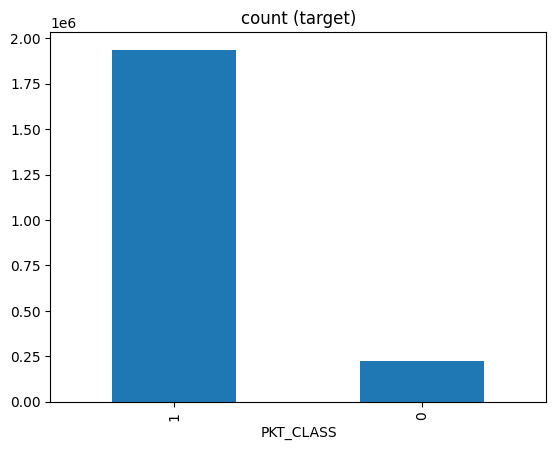

In [13]:
class_count_0, class_count_1 = df['PKT_CLASS'].value_counts()
# Separate class
class_0 = df[df['PKT_CLASS'] == 0]
class_1 = df[df['PKT_CLASS'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['PKT_CLASS'].value_counts())# plot the count after under-sampeling
test_under['PKT_CLASS'].value_counts().plot(kind='bar', title='count (target)')

# **Create X=Features , y=labels(Target)**


In [65]:
X=df.drop("PKT_CLASS",axis=1)
y=df["PKT_CLASS"]
X.head(),y.head()

(    SRC_ADD   DES_ADD    PKT_ID  FROM_NODE   TO_NODE PKT_TYPE  PKT_SIZE  \
 0 -1.307462  0.709157  0.508523   0.224525  0.411185   b'tcp'  0.149877   
 1  0.061139  0.691593 -0.455629   0.542950  0.600476   b'tcp'  0.149877   
 2  1.104698 -0.379809 -1.168094   0.542950  0.221893   b'ack' -0.303824   
 3  1.190236 -1.082367  0.781876   0.542950  0.032601   b'ack' -0.303824   
 4  1.178831 -1.199460 -0.679975   0.542950  0.032601   b'ack' -0.303824   
 
         FLAGS       FID  SEQ_NUMBER  ...  PKT_DELAY_NODE  PKT_RATE BYTE_RATE  \
 0  b'-------' -0.906408     11339.0  ...             0.0 -0.088099  0.434896   
 1  b'-------'  0.187240      6274.0  ...             0.0 -0.088259  0.434763   
 2  b'-------'  0.187240      1930.0  ...             0.0 -0.088258 -0.786374   
 3  b'-------' -0.359584     12670.0  ...             0.0 -0.088902 -0.786394   
 4  b'-------' -0.450722      4901.0  ...             0.0 -0.088678 -0.786387   
 
   PKT_AVG_SIZE  UTILIZATION  PKT_DELAY  PKT_SEND_TIME

# **Data Preprocessing**

# Make Our Data All Numerical
Create A Function that turns our Data into numerical with The Label Encoder.

In [66]:
def encode(Class):
  LE = LabelEncoder()
  LE.fit(Class)
  print(list(LE.classes_))
  return LE.transform(Class)


Apply This Function Into Our Data

Here We See Our 4 Encoded Classes Turned Into int64 i will make Them in a float64 Format

In [67]:
classes={"PKT_TYPE","FLAGS","NODE_NAME_FROM","NODE_NAME_TO"}

def Data_Loa(X):
  for i in classes:
    X.loc[:,i]=encode(X.loc[:,i])

In [68]:
Data_Loa(X)


[b'Router', b'Switch1', b'Switch2', b'clien-0', b'clien-1', b'clien-10', b'clien-11', b'clien-12', b'clien-13', b'clien-14', b'clien-15', b'clien-16', b'clien-17', b'clien-18', b'clien-19', b'clien-2', b'clien-3', b'clien-4', b'clien-5', b'clien-6', b'clien-7', b'clien-8', b'clien-9', b'client-0', b'client-1', b'client-10', b'client-11', b'client-12', b'client-13', b'client-14', b'client-15', b'client-16', b'client-17', b'client-18', b'client-19', b'client-2', b'client-3', b'client-4', b'client-5', b'client-6', b'client-7', b'client-8', b'client-9', b'clienthttp', b'http_client', b'router', b'server1', b'switch1', b'switch2', b'webcache', b'webserverlistin']
[b'-------', b'---A---']
[b'ack', b'cbr', b'ping', b'tcp']
[b'Router', b'Switch1', b'Switch2', b'clien-0', b'clien-1', b'clien-10', b'clien-11', b'clien-12', b'clien-13', b'clien-14', b'clien-15', b'clien-16', b'clien-17', b'clien-18', b'clien-19', b'clien-2', b'clien-3', b'clien-4', b'clien-5', b'clien-6', b'clien-7', b'clien-8', 

In [69]:
X["PKT_TYPE"]=X["PKT_TYPE"].astype(float)
X["FLAGS"]=X["FLAGS"].astype(float)
X["NODE_NAME_FROM"]=X["NODE_NAME_FROM"].astype(float)
X["NODE_NAME_TO"]=X["NODE_NAME_TO"].astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 27 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            float64
 3   FROM_NODE         float64
 4   TO_NODE           float64
 5   PKT_TYPE          float64
 6   PKT_SIZE          float64
 7   FLAGS             float64
 8   FID               float64
 9   SEQ_NUMBER        float64
 10  NUMBER_OF_PKT     float64
 11  NUMBER_OF_BYTE    float64
 12  NODE_NAME_FROM    float64
 13  NODE_NAME_TO      float64
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

# **What if There Were Missing Value ?**

Visualize If We Have Missing Values If Yes :

---




1.Fill Them With Some Value (Mean Or Median)   
2.remove or Drop The Samples With Missing Data    



In [70]:
#See How many Missing Data We Have
df.isna().sum()

SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64



>  ***Furtunately We Have 0 Missing Data***



In [71]:
X.describe()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
count,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,...,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06
mean,-3.648627e-17,1.083572e-17,-2.164841e-17,-2.924163e-17,1.930944e-17,1.387685e+00,1.259508e-18,3.665533e-04,2.308550e-17,1.855904e+04,...,1.032710e-03,2.821561e-17,-3.354303e-18,6.218615e-18,1.086326e-01,4.938061e-17,3.720975e-17,3.306948e-17,3.427966e-17,-2.104661e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.309441e+00,1.000000e+00,1.914208e-02,1.000000e+00,1.380528e+05,...,8.840022e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.005466e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.649613e+00,-2.136204e+00,-1.484735e+00,-3.118929e+00,-3.942529e+00,0.000000e+00,-3.038242e-01,0.000000e+00,-1.270957e+00,-1.000000e+00,...,-3.921600e-02,-1.574359e+00,-8.314670e-01,-3.038231e-01,5.000000e-06,-6.065330e+00,-1.746509e+00,-1.746508e+00,-5.696482e-01,-2.947236e+00
25%,-8.512617e-01,-8.481807e-01,-9.659121e-01,2.245255e-01,3.260079e-02,0.000000e+00,-3.038242e-01,0.000000e+00,-8.152708e-01,2.353000e+03,...,0.000000e+00,-8.867923e-02,-7.863592e-01,-3.038231e-01,8.441000e-03,-2.944797e-01,-8.172868e-01,-8.173265e-01,-4.595813e-01,-4.000632e-02
50%,-5.291078e-02,6.892507e-01,-4.493941e-02,3.837376e-01,4.111846e-01,1.000000e+00,-1.510523e-02,0.000000e+00,-2.684470e-01,5.555000e+03,...,0.000000e+00,-8.820339e-02,-5.185589e-01,-1.510478e-02,5.960500e-02,-2.944797e-01,-2.238743e-02,-2.247754e-02,-4.562776e-01,-3.887603e-02
75%,1.102417e+00,7.173530e-01,8.760371e-01,5.429497e-01,4.111846e-01,3.000000e+00,1.498770e-01,0.000000e+00,6.429262e-01,1.074700e+04,...,0.000000e+00,-8.710379e-02,4.349861e-01,1.498771e-01,2.363210e-01,-2.519788e-01,6.924173e-01,6.922532e-01,-4.562737e-01,-3.770671e-02
max,1.315691e+00,9.082147e-01,1.797008e+00,1.020586e+00,9.790602e-01,3.000000e+00,1.970181e+01,1.000000e+00,2.374535e+00,3.015537e+06,...,1.144640e-01,3.499848e+00,3.371149e+00,1.970182e+01,2.364980e-01,7.453495e+00,2.488244e+00,2.486573e+00,2.182022e+00,1.524741e+00


In [72]:
X['PKT_CLASS']=y
 

# ***Normalize Our Data***
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.


In [73]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
  if mean is None:
    mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
  return mean,sd

In [74]:
list1=list(set(list(X.columns))-set(["PKT_TYPE","SEQ_NUMBER","NUMBER_OF_BYTE","PKT_DELAY_NODE","FLAGS","UTILIZATION","NODE_NAME_FROM","NODE_NAME_TO","PKT_CLASS"]))
dict1={}
for i in list1:
  mean1,std1=encode_numeric_zscore(df, i)
  dict1[i]=[mean1,std1]



<Axes: >

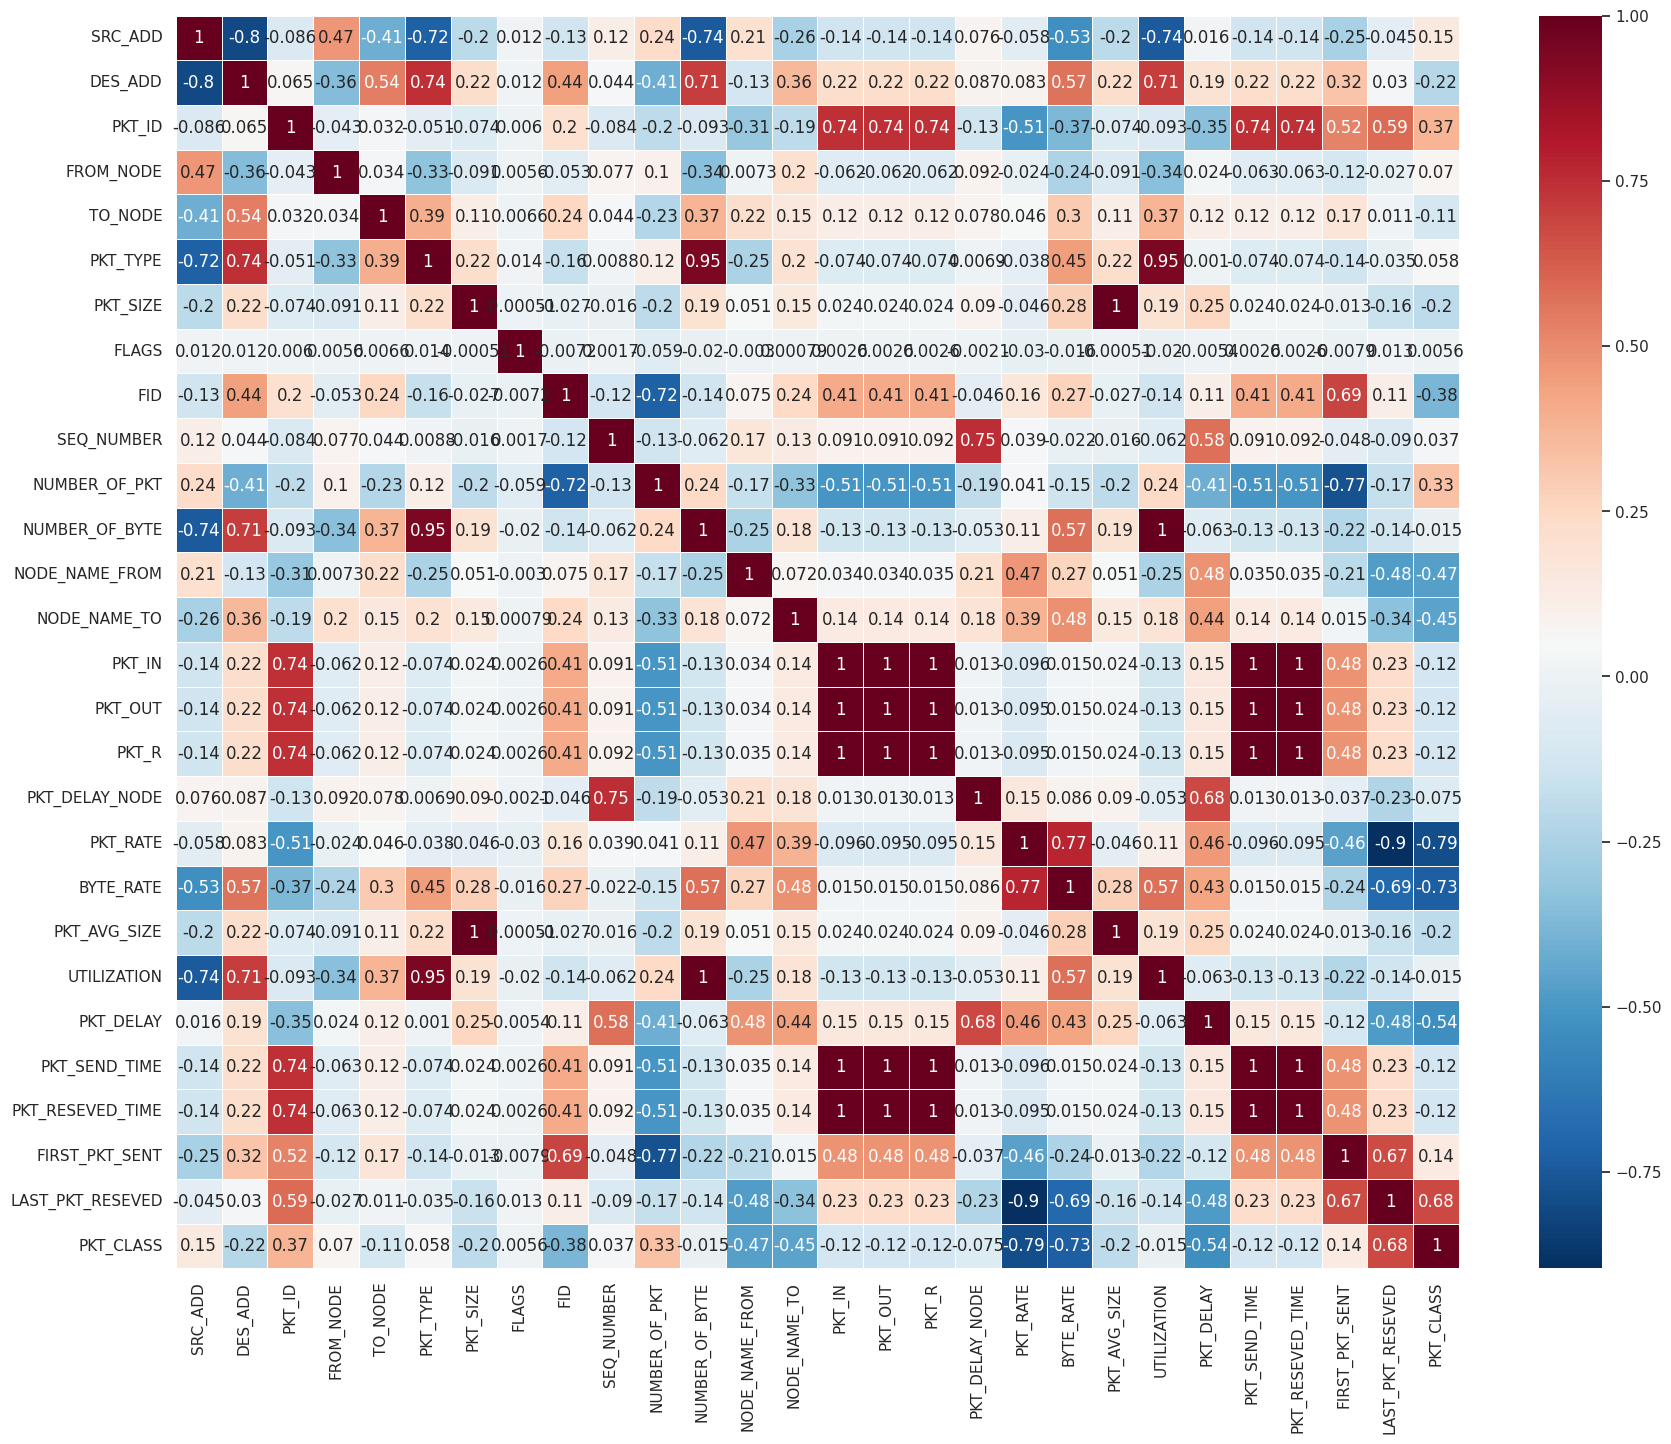

In [75]:
 #To find the correlation among
# the columns using pearson method
import seaborn as sb

# To find the correlation among
# the columns using pearson method
matrix_corr_pearson=X.corr(method ='pearson')

sb.set(rc={'figure.figsize':(20.7,16.27)})
sb.heatmap(matrix_corr_pearson,
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [76]:
X.drop(columns=['FROM_NODE',"PKT_TYPE","FLAGS","SEQ_NUMBER","NUMBER_OF_BYTE","UTILIZATION",'PKT_DELAY_NODE','PKT_R','PKT_OUT','PKT_IN','PKT_SEND_TIME','PKT_RESEVED_TIME','PKT_CLASS'],axis=1,inplace=True)


In [79]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
# the device variable was set above to be "cuda" if available or "cpu" if not

X = torch.tensor(X.values, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1).to(device)

# > **Building a model**
# We've got some data ready, now it's time to build a model.

 We'll break it down into a few parts.

 1-Setting up device agnostic code (so our model can run on CPU or GPU if it's available).

 2-Constructing a model by subclassing nn.Module.

 3-Defining a loss function and optimizer.

 4-Creating a training loop

**This setup where we have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.**

**To create such a model it'll need to handle the input and output shapes of X and y.**

**Remember how I said input and output shapes are important? Here we'll see why.**

**Let's create a model class that:**

1. **Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).**
2. **Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.**
3. **Defines a forward() method containing the forward pass computation of the model.**
4. **Instantiates the model class and sends it to the target device**

In [94]:
class Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(15, 30)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(30, 15)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(15, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x
model = Deep().to(device)

In [96]:
import copy
import numpy as np
import torch.nn as nn
import torch.optim as optim
import tqdm


# loss function and optimizer
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.00001)

n_epochs = 3600  # number of epochs to run
batch_size = 128  # size of each batch
# Hold the best model
best_acc = - np.inf   # init to negative infinity
best_weights = None
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
Loss_p= []

for epoch in range(n_epochs):
        # print(epoch)
    model.train()

     # forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
                # backward pass
    optimizer.zero_grad()
    loss.backward()
                # update weights
    optimizer.step()
                # print progress
                 ### Testing
    model.eval() # put the model in evaluation mode for testing (inference)
                 # 1. Forward pass
    with torch.inference_mode():
        test_pred = model(X_test)

                # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        Loss_p.append(test_loss)
     # evaluate model with accuracy
    y_pred = model(X_test)
    acc = (y_pred.round() == y_test).float().mean()
    acc = float(acc)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss} | Accuracy: {acc}")



Epoch: 0 | Train loss: 0.281953364610672 | Test loss: 0.28173550963401794 | Accuracy: 0.9750169515609741
Epoch: 100 | Train loss: 0.27596527338027954 | Test loss: 0.2757451832294464 | Accuracy: 0.9753432869911194
Epoch: 200 | Train loss: 0.2701433300971985 | Test loss: 0.2699195444583893 | Accuracy: 0.975447416305542
Epoch: 300 | Train loss: 0.26449739933013916 | Test loss: 0.26426950097084045 | Accuracy: 0.9755376577377319
Epoch: 400 | Train loss: 0.25900575518608093 | Test loss: 0.2587727904319763 | Accuracy: 0.9756348133087158
Epoch: 500 | Train loss: 0.25343501567840576 | Test loss: 0.25319617986679077 | Accuracy: 0.9756926894187927
Epoch: 600 | Train loss: 0.2481193244457245 | Test loss: 0.24787677824497223 | Accuracy: 0.975810706615448
Epoch: 700 | Train loss: 0.24303169548511505 | Test loss: 0.24278579652309418 | Accuracy: 0.9759287238121033
Epoch: 800 | Train loss: 0.23813770711421967 | Test loss: 0.2378881871700287 | Accuracy: 0.9759935140609741
Epoch: 900 | Train loss: 0.2333

In [102]:
checkpoint = {'model': Deep(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')